# Water-Treatment-Palnt
This dataset comes from the daily measures of sensors in a urban waste water treatment plant. The objective is to classify the operational state of the plant in order to predict faults through the state variables of the plant at each of the stages of the treatment process. This domain has been stated as an ill-structured domain.
For more information please read the [data documentation](https://data.world/uci/water-treatment-plant).

# Import required libraries

pandas and numpy are used to perform data manipulation and related tasks. pandas is used to analyze and visualize data, and to perform some queries on data.

In [ ]:
import pandas as pd
import numpy as np

# Read water treatment plant dataset

**Read the water-treatment data form Google drive and check the shape of the loaded dataframe.**
* A simple way to store big data sets is to use CSV files (comma separated files).
* Use read_csv() function from pandas to load the CSV into a DataFrame
* The shape of an array is the number of elements in each dimension.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
water_data = pd.read_csv('/content/drive/MyDrive/Water_Treatment_Plant/water-treatment.data')
print(type(water_data))
print("Dataset size: ", water_data.shape)

<class 'pandas.core.frame.DataFrame'>
Dataset size:  (520, 39)


# Display samples

* **Check the top few rows to see how the data looks.**
* **Use the head(n=5) utility from pandas**
head(n) returns the first n rows.

In [ ]:
# pandas display data frames as tables
pd.set_option('display.max_columns', None)
water_data.head()

,class,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,DBO-P,SS-P,SSV-P,SED-P,COND-P,PH-D,DBO-D,DQO-D,SS-D,SSV-D,SED-D,COND-D,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,Normal_situation,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,7.9,NaN,228,70.2,5.5,2120,7.9,NaN,280.0,94.0,72.3,0.3,2010,7.3,NaN,84.0,21.0,81.0,0.02,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,Normal_situation,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,7.7,NaN,244,75.4,7.7,2570,7.6,NaN,474.0,96.0,79.2,0.4,2700,7.5,NaN,91.0,17.0,94.1,0.00,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,Normal_situation,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,7.7,NaN,220,72.7,4.5,1594,7.7,NaN,272.0,92.0,78.3,0.2,1742,7.6,NaN,128.0,21.0,81.0,0.05,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,Normal_situation,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,236.0,268,73.1,8.5,2280,7.8,158.0,376.0,96.0,77.1,0.4,2060,7.6,20.0,104.0,20.0,96.7,0.00,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,Normal_situation,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,7.9,NaN,236,57.6,4.5,2020,7.8,NaN,372.0,88.0,68.2,0.2,2250,7.6,19.0,108.0,22.0,65.9,0.02,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


**Print a concise summary of dataframe using info() function**

In [ ]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   class      520 non-null    object 
 1   Q-E        502 non-null    float64
 2   ZN-E       517 non-null    float64
 3   PH-E       520 non-null    float64
 4   DBO-E      497 non-null    float64
 5   DQO-E      514 non-null    float64
 6   SS-E       519 non-null    float64
 7   SSV-E      509 non-null    float64
 8   SED-E      495 non-null    float64
 9   COND-E     520 non-null    int64  
 10  PH-P       520 non-null    float64
 11  DBO-P      480 non-null    float64
 12  SS-P       520 non-null    int64  
 13  SSV-P      509 non-null    float64
 14  SED-P      496 non-null    float64
 15  COND-P     520 non-null    int64  
 16  PH-D       520 non-null    float64
 17  DBO-D      492 non-null    float64
 18  DQO-D      511 non-null    float64
 19  SS-D       518 non-null    float64
 20  SSV-D     

**Display statistical summary of data by using describe() function**

In [ ]:
water_data.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,DBO-P,SS-P,SSV-P,SED-P,COND-P,PH-D,DBO-D,DQO-D,SS-D,SSV-D,SED-D,COND-D,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,502.000000,517.000000,520.000000,497.000000,514.000000,519.000000,509.000000,495.000000,520.000000,520.000000,480.000000,520.000000,509.000000,496.000000,520.000000,520.000000,492.000000,511.000000,518.000000,507.000000,495.000000,520.000000,519.000000,497.000000,503.000000,515.000000,503.000000,492.000000,519.000000,458.000000,516.000000,493.000000,482.000000,496.000000,485.000000,497.000000,512.000000,489.000000
mean,37208.605578,2.371779,7.811346,188.895372,407.229572,223.761079,61.653045,4.513535,1474.951923,7.830769,206.364583,250.071154,60.575246,4.933871,1492.886538,7.814038,122.430894,274.187867,94.204633,73.065680,0.416364,1486.109615,7.711946,18.971831,85.998012,21.382524,80.182107,0.023150,1489.537572,39.101528,58.465310,90.561663,83.613485,68.057258,89.295464,78.091147,89.351758,99.417587
std,6649.724155,2.763961,0.247232,62.228257,120.791517,124.719874,12.106649,2.288857,387.986313,0.227442,74.818796,131.191034,12.131925,2.766492,396.446718,0.199651,37.019471,73.936432,24.114745,10.417275,0.381764,389.245347,0.187165,9.300495,35.513843,11.744329,9.209775,0.049573,373.770812,14.761677,12.519165,8.882689,8.208327,11.259879,5.631715,8.300328,6.328459,1.369373
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,32.000000,104.000000,7.100000,1.000000,646.000000,7.100000,26.000000,80.000000,49.000000,20.200000,0.000000,85.000000,7.000000,3.000000,9.000000,6.000000,29.200000,0.000000,683.000000,4.600000,5.300000,7.700000,8.200000,1.400000,29.500000,19.200000,38.300000,84.600000
25%,32885.000000,0.900000,7.600000,147.000000,325.250000,170.000000,55.800000,3.050000,1200.000000,7.700000,153.000000,184.000000,54.200000,3.000000,1217.750000,7.700000,97.750000,220.500000,78.000000,67.800000,0.200000,1227.250000,7.600000,14.000000,63.500000,14.000000,75.000000,0.000000,1234.000000,29.150000,50.600000,88.600000,81.500000,63.275000,87.600000,74.000000,87.700000,99.300000
50%,35868.500000,1.500000,7.800000,183.000000,400.000000,196.000000,64.300000,4.500000,1405.500000,7.800000,197.000000,220.000000,62.900000,4.500000,1420.500000,7.800000,120.000000,274.000000,90.000000,74.600000,0.300000,1427.500000,7.700000,18.000000,83.000000,19.000000,81.300000,0.010000,1431.000000,39.600000,59.400000,93.300000,85.500000,69.950000,90.200000,79.200000,90.700000,99.700000
75%,41211.750000,3.000000,8.000000,223.000000,477.500000,242.000000,69.800000,5.500000,1672.000000,8.000000,243.000000,272.000000,69.100000,6.000000,1706.250000,7.900000,148.000000,325.000000,106.000000,79.500000,0.500000,1695.500000,7.800000,23.000000,100.000000,24.000000,86.000000,0.020000,1690.000000,49.125000,66.750000,95.800000,87.975000,75.425000,92.500000,83.400000,93.025000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,25.000000,2950.000000,8.500000,517.000000,1692.000000,93.500000,35.000000,2980.000000,8.400000,285.000000,511.000000,244.000000,100.000000,3.500000,2950.000000,9.700000,105.000000,295.000000,104.000000,100.000000,0.500000,2850.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


# Exploratory Data Analysis (EDA)

For visualization purposes, we use matplotlib and seaborn along with pandas' visualization capabilities wherever possible.

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [ ]:
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* Use the Seaborn's **histplot()** function to create histograms to visualize the distribution of PH-E feature
  * **data**: provides the data to plot via a Pandas DataFrame
  * **x**: provides the variable to plot on the x-axis
  *  **hue**: allows you to split a categorical variable into additional groups, (splitting the variable into relevant groups)
  * **binwidth** and **bins**: determine how wide and how many bins should be plotted, respectively
  * **kde**: draws a kernel density estimate

histplot() creates histograms to visulaize the distribution of a dataset. This plot is appropriate for continuous features.

Text(0.5, 1.0, 'input ph to plant')

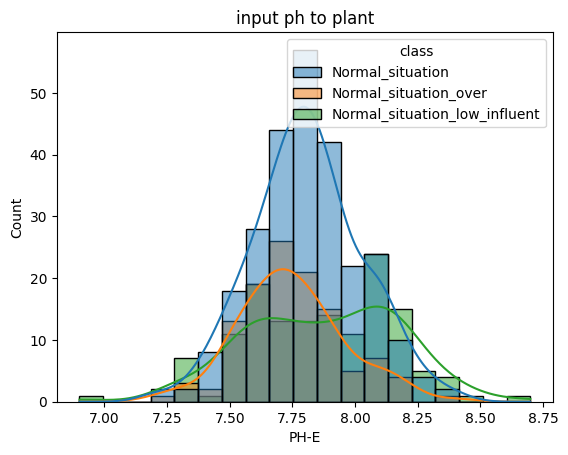

In [ ]:
sns.histplot(data=water_data, x='PH-E', hue='class', kde=True)
plt.title('input ph to plant')

* Visulaize the Seaborn's **barplot()** function for PH-E feature

barplot() Creates Bar Charts. A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

* A bar chart is a chart or graph that represents **numerical** measures (such as counts) broken out by a **categorical** variable.
* **data**: specifies the pandas DataFrame we want to use.
* **x**: represents the categorical column label
* **y**: represents the column that we want to aggregate data for
*  **hue**: allows you to split a categorical variable into additional groups, (splitting the variable into relevant groups).

<Axes: xlabel='class', ylabel='PH-E'>

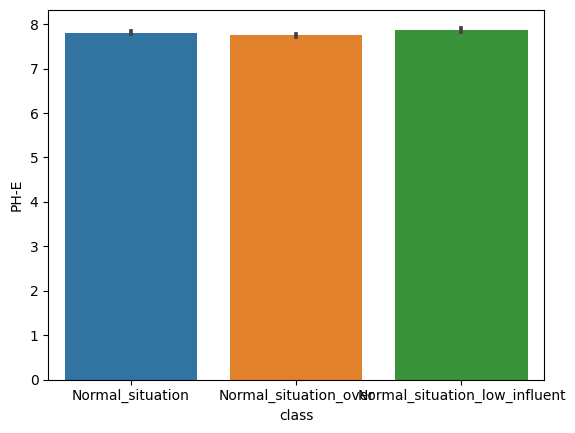

In [ ]:
sns.barplot(data=water_data, x='class', y='PH-E')

* Use the Seaborn's **histplot()** function to create histograms to visualize the distribution of SSV-E feature

Text(0.5, 1.0, 'input volatile suspended solids to plant')

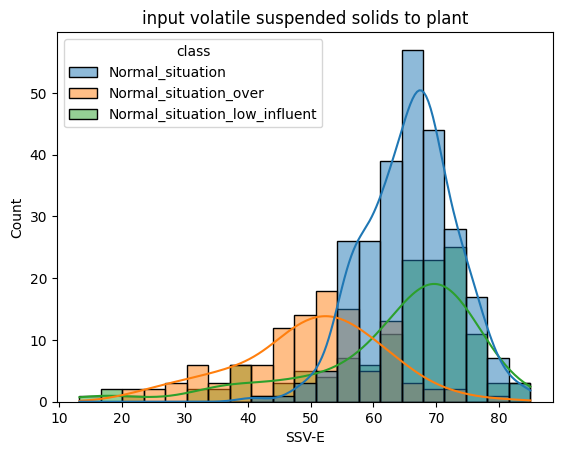

In [ ]:
sns.histplot(data=water_data, x='SSV-E', hue='class', kde=True)
plt.title('input volatile suspended solids to plant')

<Axes: xlabel='SSV-E', ylabel='PH-E'>

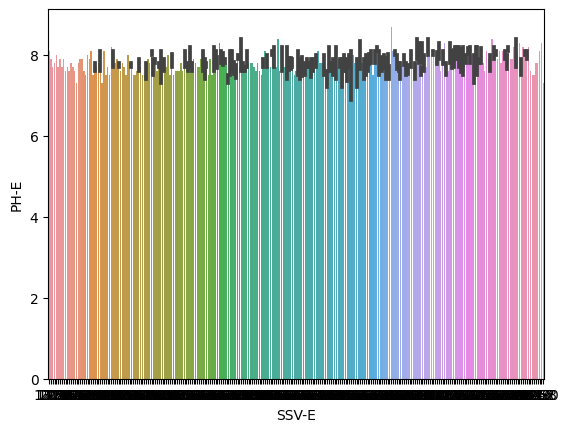

In [ ]:
sns.barplot(data=water_data, x='SSV-E',y='PH-E')

* Use the Seaborn's **histplot()** function to create histograms to visualize the distribution of SED-E feature

Text(0.5, 1.0, 'input sediments to plant')

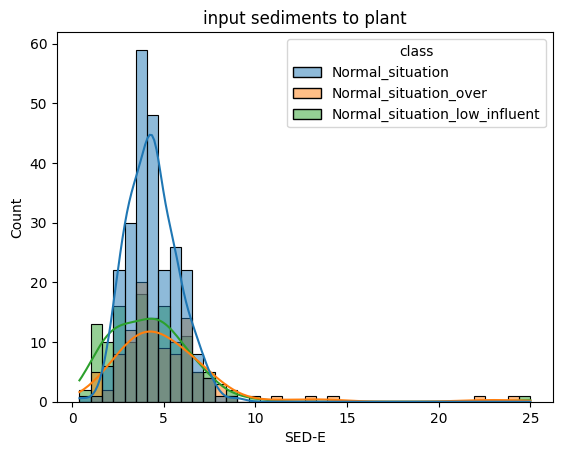

In [ ]:
sns.histplot(data=water_data, x='SED-E', hue='class', kde=True)
plt.title('input sediments to plant')

<Axes: xlabel='class', ylabel='SED-E'>

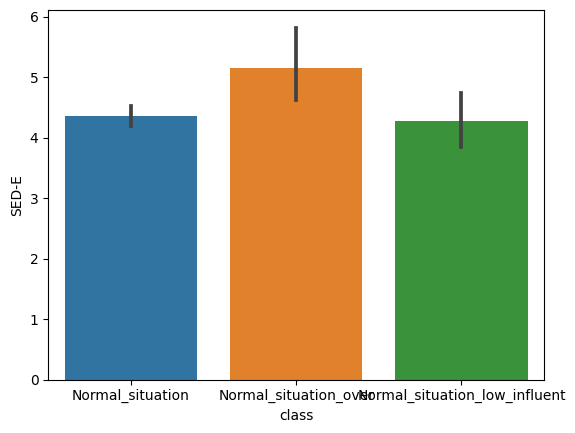

In [ ]:
sns.barplot(data=water_data, x='class',y='SED-E')

* Use the Seaborn's **countplot()** function to visualize the class distribution

A count plot is similar to a bar plot and a histogram and provides counts of categorical values.

<Axes: xlabel='class', ylabel='count'>

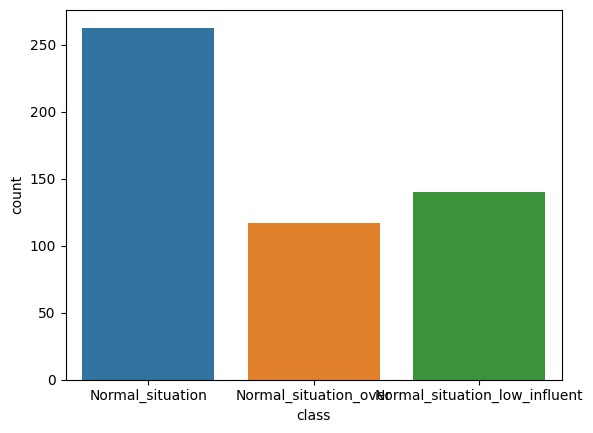

In [ ]:
# Draw a Histogram
sns.countplot(data=water_data, x='class')

Water treatment plant data is partially imbalanced.

In machine learning, imbalance ratios from 1:4 to 1:5000 are considered imbalanced classifications.

* Investigate the correlation between features extracted from the primary settler and secondary settler.

* Use **relplot()** function to show relationship between PH-P and PH-D.

Relational plots show the relationship between two or more continuous variables.

We can customize the type of visualization that is created by using the **kind**= 'scatter' or 'line' parameter.

Text(0.5, 1.0, 'The ralationship between PH-D and PH-P')

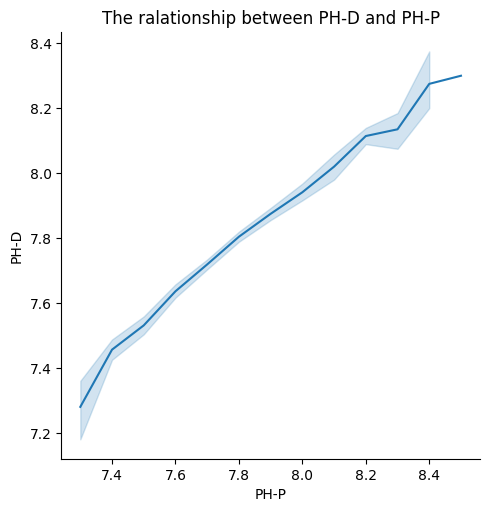

In [ ]:
sns.relplot(data=water_data, x='PH-P', y='PH-D', kind='line')
plt.title('The ralationship between PH-D and PH-P')

* PH-P (PH-P measured in  primary settler) is linearly depend on PH-D (PH-D measured in  secondary settler).

* Use **relplot()** function to show relationship between DBO-P and DBO-D.

Text(0.5, 1.0, 'Biological demand of oxygen')

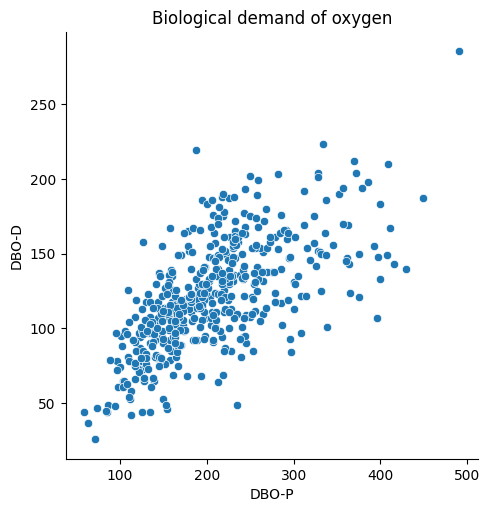

In [ ]:
sns.relplot(data=water_data, x='DBO-P', y='DBO-D', kind='scatter')
plt.title('Biological demand of oxygen')

* Use **relplot()** function to show relationship between SS-P and SS-D.

Text(0.5, 1.0, 'Suspended Solids')

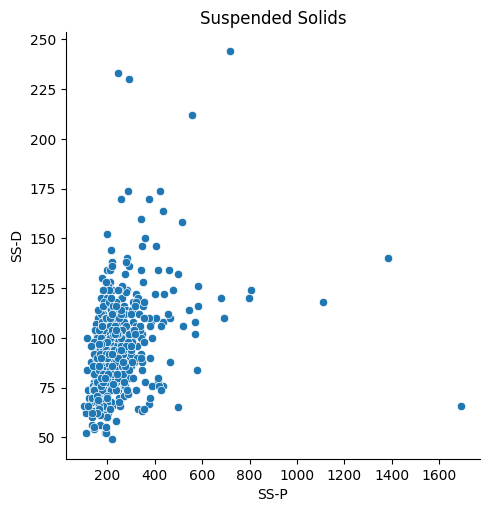

In [ ]:
sns.relplot(data=water_data, x='SS-P', y='SS-D', kind='scatter')
plt.title('Suspended Solids')

* Use **relplot()** function to show relationship between SSV-P and SSV-D.

Text(0.5, 1.0, 'Volatile Suspended Solids')

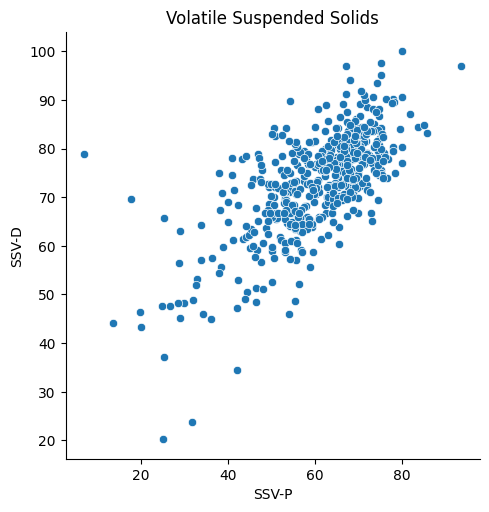

In [ ]:
sns.relplot(data=water_data, x='SSV-P', y='SSV-D', kind='scatter')
plt.title('Volatile Suspended Solids')

* Use **relplot()** function to show relationship between SED-P and SED-D.

Text(0.5, 1.0, 'Sediments')

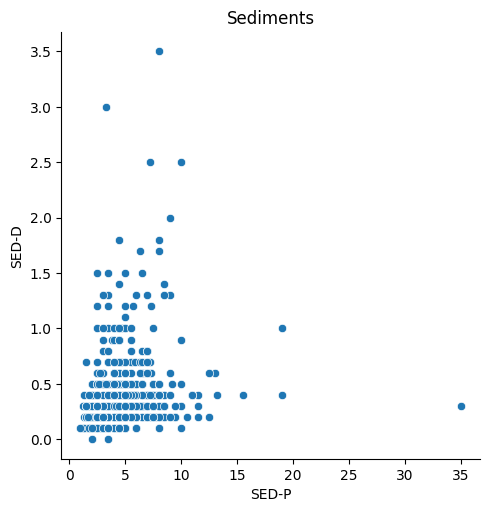

In [ ]:
sns.relplot(data=water_data, x='SED-P', y='SED-D', kind='scatter')
plt.title('Sediments')

* Use **relplot()** function to show relationship between COND-P and COND-D.

Text(0.5, 1.0, 'Conductivity')

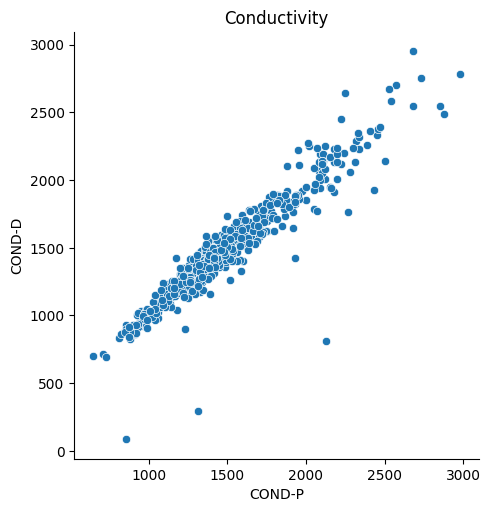

In [ ]:
sns.relplot(data=water_data, x='COND-P', y='COND-D', kind='scatter')
plt.title('Conductivity')

* COND-P (conductivity measured in  primary settler) is linearly depend on COND-D (conductivity measured in  secondary settler).

# Correlations between attributes

Correlation helps us understand relationships between different attributes of the data. Correlations can help us understand and exploit data relationships to build better models.

* **Prepare a correlational matrix using the pandas utility function of corr()**.
* **Use seaborns's heatmap() function to plot the correlation matrix**.

A heatmap is a plot of rectangular data as a color-encoded matrix.  It can show the relation between variabels.

Important Parameters:
* **data**: refers to the Pandas DataFrame to use
* **vmin, vmax**: Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.
* **cmap**: allows you to customize the colormap used in the visualization
* **annot**: If True, write the data value in each cell.
* **square**: allows you to create square values in the heatmap

<Axes: >

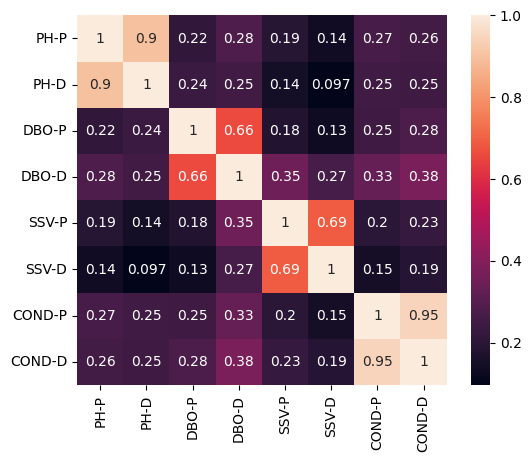

In [ ]:
corrMatt = water_data[['PH-P','PH-D','DBO-P','DBO-D','SSV-P','SSV-D','COND-P','COND-D']].corr()
sns.heatmap(corrMatt, square=True, annot=True)

# Model Design

# Model Evaluation

The dataset is usually divided at hand into training and testing sets to evaluate the performance of the models.

* Use scikit-learn’s train_test_split() function available through model_selection module.
  * **X**: data matrix
  * **y**: class label vector
  * **test_size**: represent the proportion of the dataset to include in the test split
  *  **stratify**:  data is split in a stratified fashion (reserving the percentage of samples for each class), using this as the class labels.
  * **random_state**: Controls the shuffling applied to the data before applying the split

* Split our dataset into 70% and 30% as train and test, respectively.

In [ ]:
from sklearn.model_selection import train_test_split

# data
X = water_data.drop(columns=['class', 'PH-D', 'COND-D'])
# class label
y = water_data['class']
# Split X & y into training ad test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1402)
# print training and test size
print()
print("Training set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape)


Training set:  (364, 36) (364,)
Testing set:  (156, 36)


# Data preprocessing

# KNN imputer for missing values

**Impute the missing values by using KNNImputer**

Each sample’s missing values are imputed using the mean value from k nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

The key components of KNNImputer are as follows:

* **missing_values**: The placeholder for the missing values. (int, float, str, np.nan or None, default=np.nan)
* **n_neighborsint** (default=5) Number of neighboring samples to use for imputation.

In [ ]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(X_train)
X_train = knn_imputer.transform(X_train)
X_test = knn_imputer.transform(X_test)

In [ ]:
print('Missing values of train data: %d' % np.sum(np.isnan(X_train)))
print('Missing values of test data: %d' % np.sum(np.isnan(X_test)))

Missing values of train data: 0
Missing values of test data: 0


# Normalize features in [0,1] range

MinMaxScaler transforms features by scaling each feature to a given range.
* Use **MinMaxScaler()** function from sklearn's preprocessing

In [ ]:
# normalize features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print("Min %0.2f & Max %0.2f of trainging data" %(X_train.min(), X_train.max()))

Min 0.00 & Max 1.00 of trainging data


In [ ]:
# normalize features
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
#print("Min %0.2f & Max %0.2f of trainging data" %(X_train.min(), X_train.max()))

# Label encoding

Class labels are transformed into integer values due their string format.

Encode class labels with value between 0 and n_classes-1
* Use **LabelEncoder()** function from sklearn's preprocessing
* **classes_** attribute returns the label for each class.

**Check sample distributions in each class label**
* Use numpy's **unique()** function to obtain unique values of class label
* Use numpy's **bincount()** function to count sample numbers of each class label

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.transform(y_test)

print(le.classes_)

# Check balance or imbalance data
print("Unique lables: ", np.unique(y_train))
print("Total occurences of each class label:", np.bincount(y_train))
print(np.bincount(y_train)/np.bincount(y_train).min())

['Normal_situation' 'Normal_situation_low_influent'
 'Normal_situation_over']
Unique lables:  [0 1 2]
Total occurences of each class label: [184  98  82]
[2.24390244 1.19512195 1.        ]


# Linear SVM

SVM or Support Vector Machine is a linear model with Linear kernel for classification and regression problems.

* Use LinearSVC from sklearn's svm

**Check model overfitting on training data**

* Use **StratifiedKFold()** function available as part of the model_selection module. This cross-validation function is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class. Its key components are as:
  * **n_splits**: specifies number of folds
  * **split(X, y)** function generatea indices to split data into training and test dta
  * **X** : feature matrix
  * **y** : the target variable

We can use python's **enumerate()** for loops when we need a count and the from an iterable.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC

lin_svm_cv = LinearSVC()
skf = StratifiedKFold(n_splits=10)

X = X_train
y = y_train

tr_acc = np.zeros(10)
te_acc = np.zeros(10)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  X_tr_cv = X[train_index, :]
  X_te_cv = X[test_index, :]
  y_tr_cv = y[train_index]
  y_te_cv = y[test_index]
  lin_svm_cv.fit(X_tr_cv, y_tr_cv)
  tr_acc[i] = lin_svm_cv.score(X_tr_cv, y_tr_cv)
  te_acc[i] = lin_svm_cv.score(X_te_cv, y_te_cv)


# Plot the cross validation scores

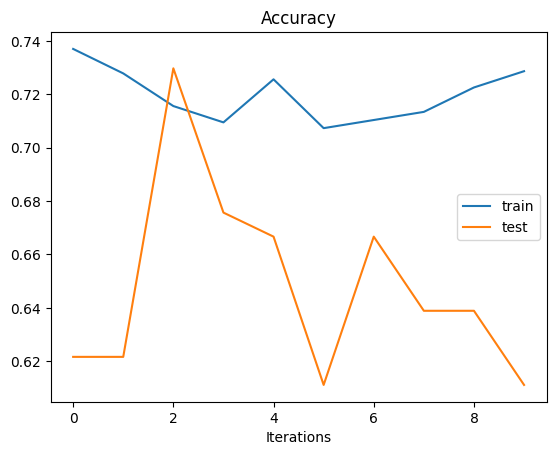

In [ ]:
plt.subplot(1,1,1)
plt.title('Accuracy')
plt.plot(tr_acc, label='train')
plt.plot(te_acc, label='test')
#plt.legend(loc='upper right')
plt.legend()
plt.xlabel('Iterations')
plt.show()

In [ ]:
print("Train accuracy: mean: %0.4f and std: %0.4f" %(np.mean(tr_acc), np.std(tr_acc)))
print("Test accuracy: mean: %0.4f and std: %0.4f" %(np.mean(te_acc), np.std(te_acc)))
print("Difference between training and test accuracies for checking overfitting problem: ", tr_acc - te_acc)

Train accuracy: mean: 0.7198 and std: 0.0094
Test accuracy: mean: 0.6482 and std: 0.0352
Difference between training and test accuracies for checking overfitting problem:  [ 0.11538144  0.10620712 -0.0141334   0.03380445  0.05894309  0.09620596
  0.04369919  0.07452575  0.08367209  0.11754743]


# Model evaluation

The linearsvm model was prepared and evaluated in the training phase needs to be checked for its performance on a completely un-seen dataset, the testing dataset.

As mentioned before, we used the **train_test_split()** function to keep a dataset specifically for testing purposes.
* Train linearsvm on training data by using **fit()** function
* Use test data on the learned linearsvm to predict class labels
* Use the **score()** function of the LinearSVC and compare results

In [ ]:
from sklearn.svm import LinearSVC
lin_svm = LinearSVC()

In [ ]:
lin_svm.fit(X_train, y_train)
train_acc = lin_svm.score(X_train, y_train)
test_acc = lin_svm.score(X_test, y_test)
print("Training accuracy", train_acc)
print("Test accuracy: ", test_acc)

Training accuracy 0.7060439560439561
Test accuracy:  0.6602564102564102


# Kernel SVM

SVM algorithms use a set of mathematical functions that are defined as the kernel. The function of kernel is to take data as input and calculates similarity between data points.

Different SVM algorithms use different types of kernel functions. These functions can be different types. For example linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid.

* Use **SVC()** function available as part of sklearn's svm.
* The key components of svc are as:
  * **C** (default=1.0): is a regularization parameter.
  * **kernel** (default='rbf'): specifies the kernel type.
  {'linear', 'ploy', 'rbf', 'sigmoid', 'precomputed'}
  * **gamma** (default='scale'): Kernel coefficient for 'rbf', 'poly' and 'sigmoid'


# Check model overfitting on training data

**Check the performance of kernel svm for a large value of the gamma parameter**

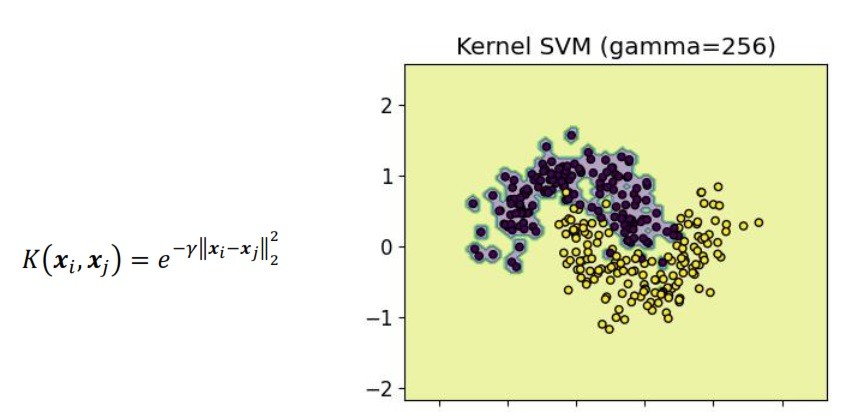

* Use StratifiedKFold() function available as part of the model_selection module. This cross-validation function is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class. Its key components are as:
  * **n_splits**: specifies number of folds
  * **split(X, y)** function generatea indices to split data into training and test dta
  * **X** : feature matrix
  * **y** : the target variable

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

rbf_svc_cv = SVC(kernel='rbf', gamma=2**8)
skf = StratifiedKFold(n_splits=10)

X = X_train
y = y_train

tr_acc = np.zeros(10)
te_acc = np.zeros(10)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  X_tr_cv = X[train_index, :]
  X_te_cv = X[test_index, :]
  y_tr_cv = y[train_index]
  y_te_cv = y[test_index]
  rbf_svc_cv.fit(X_tr_cv, y_tr_cv)
  tr_acc[i] = rbf_svc_cv.score(X_tr_cv, y_tr_cv)
  te_acc[i] = rbf_svc_cv.score(X_te_cv, y_te_cv)

# Plot the cross validation scores

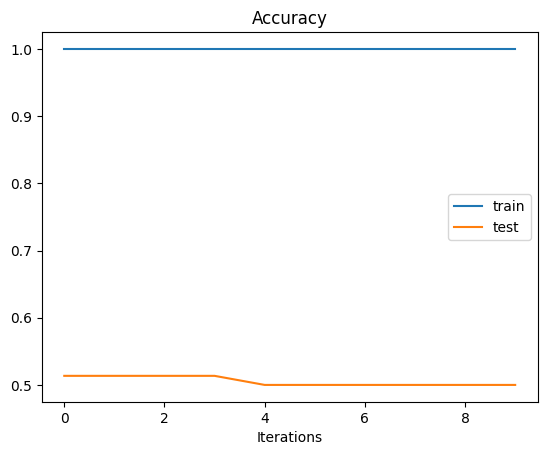

In [ ]:
plt.subplot()
plt.title('Accuracy')
plt.plot(tr_acc, label='train')
plt.plot(te_acc, label='test')
#plt.legend(loc='upper right')
plt.legend()
plt.xlabel('Iterations')
plt.show()

**Check the performance of kernel svm for a small value of gamma parameter**

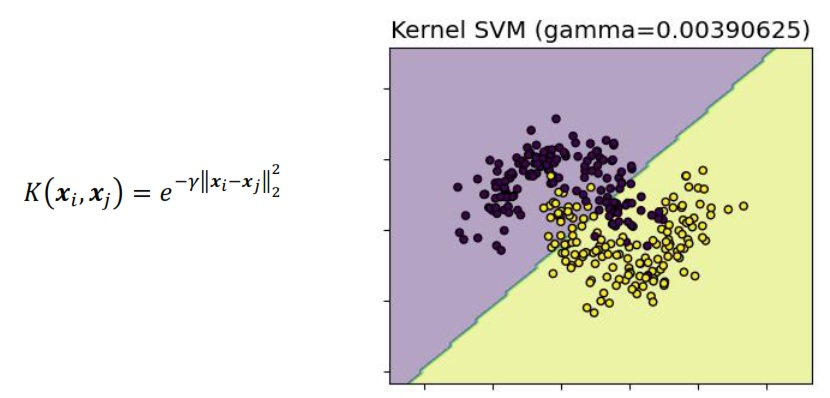

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

rbf_svc_cv = SVC(kernel='rbf', gamma=2**-8)
skf = StratifiedKFold(n_splits=10)

X = X_train
y = y_train

tr_acc = np.zeros(10)
te_acc = np.zeros(10)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  X_tr_cv = X[train_index, :]
  X_te_cv = X[test_index, :]
  y_tr_cv = y[train_index]
  y_te_cv = y[test_index]
  rbf_svc_cv.fit(X_tr_cv, y_tr_cv)
  tr_acc[i] = rbf_svc_cv.score(X_tr_cv, y_tr_cv)
  te_acc[i] = rbf_svc_cv.score(X_te_cv, y_te_cv)

**Plot the cross validation scores**

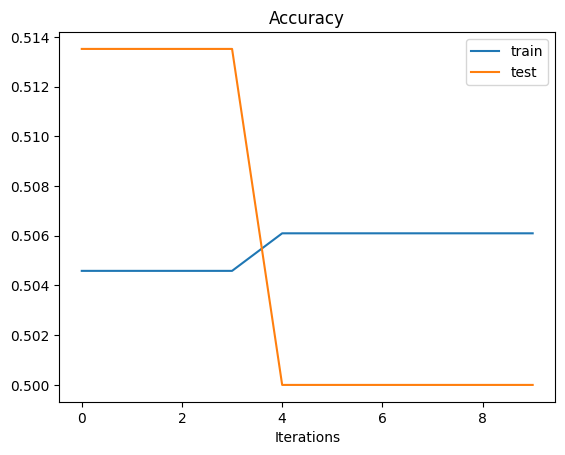

In [ ]:
plt.subplot(1,1,1)
plt.title('Accuracy')
plt.plot(tr_acc, label='train')
plt.plot(te_acc, label='test')
#plt.legend(loc='upper right')
plt.legend()
plt.xlabel('Iterations')
plt.show()

# GridSearch for fine tuning hyperparameters

The training process for kernel svm is a bit different as compared to linear svm.
In this case, we have quite a handful of hyperparameters to tune.

The grid search of hyperparameters with k-fold cross validation is an iterative process wrapped, optimized, and standardized by GridSearchCV() function.

The GridSearchCV() function will in turn search in this defined list of possible values to arrive at the
best one value.

* sklearn provides a utility to grid search the hyperparameters while cross validating the model using the GridSearchCV() method from model_selection module.
* The GridSearchCV() takes the Regression/Classifier as input parameter along with a dictionary of hyperparameters, number of cross validations require.
* The **dictionary** provides a list of feasible values for each of the hyperparameters that we want to fine-tune.

In [ ]:
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf')

In [ ]:
from sklearn.model_selection import GridSearchCV

C_range = np.arange(1, 10, 2)
gamma_range = np.arange(2**-8, 2**8, 2)

# Create a dictionary of hyperparameters
param_grid = {'gamma': gamma_range, 'C': C_range}

grid = GridSearchCV(rbf_svc, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 3, 'gamma': 2.00390625} with a score of 0.76


In [ ]:
best_rbf_svc = grid.best_estimator_
acc_train = best_rbf_svc.score(X_train, y_train)
acc_test = best_rbf_svc.score(X_test, y_test)
print("Training accuracy:", acc_train)
print("Test accuracy: ", acc_test)

Training accuracy: 0.9807692307692307
Test accuracy:  0.8269230769230769
